<a href="https://colab.research.google.com/github/jkjh23/BusanAIDeveloperCourse_AI/blob/master/1_Analysis/5-1_%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EA%B8%B0%EB%B3%B8_%EC%8B%A4%EC%82%AC%EB%A1%80%20%EC%A0%81%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연구목표

- 연간 음원(음반) 출시 데이터를 이용해 음반 제작 현황 파악 및 편중 현상 등 분석
- 기타 데이터 상황에 따라 추가 분석 진행
- pandas를 좀 더 유기적으로 사용할 수 있게 실습

# 데이터 수집

- 제공되는 music.csv를 이용

# 데이터 준비

- 데이터를 로드, 통찰을 얻고, 필요한 데이터를 생성

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# 모듈 가져오기
import numpy as np
import pandas as pd

In [2]:
# csv 데이터 로드(읽기)
path = '/content/drive/My Drive/2020_AI_Busan/1_Analysis/data/music.csv'
music = pd.read_csv(path, encoding = 'UTF-8')
music

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
0,2017,1,Boys and Girls Music Vol. 1,샘김,알앤비/어반,2017.01.25,로엔 엔터테인먼트,8.6,2
1,2017,1,여자친구 The 1st Album 'LOL',여자친구(GFRIEND),댄스,2016.07.11,로엔엔터테인먼트,8.1,12
2,2017,1,Collage (EP),The Chainsmokers,일렉트로니카,2016.11.05,소니뮤직,7.5,5
3,2017,1,If You,에일리,발라드,2016.08.23,로엔 엔터테인먼트,6.9,1
4,2017,1,세 단어,젝스키스,발라드,2016.10.07,YG PLUS,9.0,1
...,...,...,...,...,...,...,...,...,...
2173,2018,10,RECIPE,벤,발라드,2018.05.08,(주)지니뮤직,7.1,10
2174,2018,10,Eyes On You,GOT7 (갓세븐),"댄스, 알앤비/어반",2018.03.12,(주)아이리버,8.6,7
2175,2018,10,Take,숀(SHAUN),"일렉트로니카, 인디뮤직",2018.06.27,워너뮤직코리아,3.7,4
2176,2018,10,우리 그만하자,로이킴,발라드,2018.09.18,(주)지니뮤직,7.0,2


In [3]:
# 음원은 매일 1등 수행 可
# 음악방송은 마케팅 일환으로 주간 공중파 3회, 케이블 3회의 1등 기회가 존재
# 차트 집계는 가온차트(음원, 뮤비, 음반 등 총 집계해서 기준, 반영일 늦음), 한터(pos 기반, 실제 돈 내고 결제된 데이터 기준, 실시간 반영)
music.shape

(2178, 9)

In [4]:
music.dtypes

Year              int64
Month             int64
Album Title      object
Artist Name      object
Genre            object
Date             object
Distribution     object
Rating          float64
Music Count       int64
dtype: object

In [5]:
music.head(1)

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
0,2017,1,Boys and Girls Music Vol. 1,샘김,알앤비/어반,2017.01.25,로엔 엔터테인먼트,8.6,2


In [6]:
# Date 항목이 문자열이어서, 시간계산 등에 불리 → 형변환 처리
# 데이터의 타입을 변경해서 다시 원본 반영 or 특정 컬럼으로 추가

# music['Date'] = music['Date'].astype('datetime64')
music['Date1'] = music['Date'].astype('datetime64')
music.dtypes

Year                     int64
Month                    int64
Album Title             object
Artist Name             object
Genre                   object
Date                    object
Distribution            object
Rating                 float64
Music Count              int64
Date1           datetime64[ns]
dtype: object

In [7]:
# 현재 데이터 중에서 발매사별 제작 횟수를 집계하여 상위 5개만 출력하시오

# 1. Distribution만 추출(Series)
# music['Distribution']
music.Distribution, type( music.Distribution )

(0       로엔 엔터테인먼트
 1        로엔엔터테인먼트
 2            소니뮤직
 3       로엔 엔터테인먼트
 4         YG PLUS
           ...    
 2173      (주)지니뮤직
 2174      (주)아이리버
 2175      워너뮤직코리아
 2176      (주)지니뮤직
 2177      (주)인터파크
 Name: Distribution, Length: 2178, dtype: object, pandas.core.series.Series)

In [8]:
# 2. Series 중에서 동일값의 개수를 카운트해라
# 값들의 종류는 몇 개인가 = 발매사는 총 몇 개인가 = 중복제거해라
music.Distribution.unique().shape

(24,)

In [9]:
music.Distribution.unique()

# 데이터를 살펴보고 보정 처리, 전처리를 수행해서 품질 향상
# '로엔 엔터테인먼트' '로엔엔터테인먼트'
# '소니뮤직' 'Sony Music'
# '(주)인터파크' '㈜인터파크'
# '(주)지니뮤직' '지니뮤직'
# 'Mirrorball Music' '(주)미러볼뮤직'
# '유니버설뮤직' 'Universal'
# '(주)엔에이치엔벅스' '(주)벅스'
# '워너뮤직코리아' 'Warner(Korea)'
# '퍼플파인 엔터테인먼트' '퍼플파인엔터테인먼트'

array(['로엔 엔터테인먼트', '로엔엔터테인먼트', '소니뮤직', 'YG PLUS', 'Mirrorball Music',
       '(주)지니뮤직', '유니버설뮤직', '(주)인터파크', '(주)아이리버', 'Sony Music',
       '(주)엔에이치엔벅스', '(주)벅스', '(주)뮤직앤뉴', 'Universal', '지니뮤직', '워너뮤직코리아',
       '퍼플파인 엔터테인먼트', '포크라노스', '다날 엔터테인먼트', '(주)루미넌트엔터테인먼트',
       'Warner(Korea)', '㈜인터파크', '(주)미러볼뮤직', '퍼플파인엔터테인먼트'], dtype=object)

In [10]:
dic ={
    '로엔 엔터테인먼트':0, '로엔엔터테인먼트':0, '소니뮤직':0, 'YG PLUS':0, 'Mirrorball Music':0,
       '(주)지니뮤직':0, '유니버설뮤직':0, '(주)인터파크':0, '(주)아이리버':0, 'Sony Music':0,
       '(주)엔에이치엔벅스':0, '(주)벅스':0, '(주)뮤직앤뉴':0, 'Universal':0, '지니뮤직':0, '워너뮤직코리아':0,
       '퍼플파인 엔터테인먼트':0, '포크라노스':0, '다날 엔터테인먼트':0, '(주)루미넌트엔터테인먼트':0,
       'Warner(Korea)':0, '㈜인터파크':0, '(주)미러볼뮤직':0, '퍼플파인엔터테인먼트':0
}

for d in music.Distribution :
  dic[d] += 1
dic

{'(주)루미넌트엔터테인먼트': 4,
 '(주)뮤직앤뉴': 13,
 '(주)미러볼뮤직': 6,
 '(주)벅스': 1,
 '(주)아이리버': 453,
 '(주)엔에이치엔벅스': 78,
 '(주)인터파크': 16,
 '(주)지니뮤직': 768,
 'Mirrorball Music': 8,
 'Sony Music': 6,
 'Universal': 11,
 'Warner(Korea)': 2,
 'YG PLUS': 46,
 '㈜인터파크': 2,
 '다날 엔터테인먼트': 6,
 '로엔 엔터테인먼트': 229,
 '로엔엔터테인먼트': 353,
 '소니뮤직': 39,
 '워너뮤직코리아': 61,
 '유니버설뮤직': 45,
 '지니뮤직': 16,
 '퍼플파인 엔터테인먼트': 7,
 '퍼플파인엔터테인먼트': 7,
 '포크라노스': 1}

In [11]:
# api를 이용해 간단하게 구현 - 데이터 성향이 log인 경우, 같은 데이터가 한번 나오고 또 나오고 또 나올 때
tmp = music.Distribution.value_counts().head()
# tmp = music.Distribution.value_counts()
tmp, tmp.shape

((주)지니뮤직       768
 (주)아이리버       453
 로엔엔터테인먼트      353
 로엔 엔터테인먼트     229
 (주)엔에이치엔벅스     78
 Name: Distribution, dtype: int64, (5,))

In [12]:
type(tmp)

pandas.core.series.Series

In [13]:
tmp.index

Index(['(주)지니뮤직', '(주)아이리버', '로엔엔터테인먼트', '로엔 엔터테인먼트', '(주)엔에이치엔벅스'], dtype='object')

In [14]:
tmp.values

array([768, 453, 353, 229,  78])

In [17]:
# 간단한 시각화를 통해 편중되는 현상 살펴보기
# 시각적 분석 → 파이썬에서 시각화 담당하는 모듈 : matplotlib
# 시각화 : pandas 자체로도 가능, matplotlib 가능, 기타 third part 모듈로도 가능
# 웹에서 시각화 : D3.js(https://d3js.org/) → 인터랙티브 시각화 → js, modern js(ECMA 2015, 2016, 2017)

# x는 발매사, 발매사 간에 연관성/연속성 없음 → 바 차트(or 파이 차트)로 구성하여 값의 우위를 비교
# y는 제작건수

In [15]:
# 1. 모듈 가져오기

# import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [16]:
# 한글 처리 (구글링)
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [20]:
# 한글 처리(강의, colab에서와 로컬pc(윈, 맥, 리)와 조금 다름)
import matplotlib as mpl
import matplotlib.pyplot as plt

# colab에서만 추가되는 부분
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 설치 : colab이 운용되는 우분투 리눅스에 설치
# !명령어
!apt -qq -y install fonts-nanum

In [22]:
# 폰트 정보 추출
# 폰트의 실제 위치 : /usr/share/fonts/truetype/nanum/*.ttf
# 실제 파일 > 우클릭 > 경로 복사

path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
import matplotlib.font_manager as fm
font = fm.FontProperties(fname=path, size=10)

In [ ]:
font.get_name()

In [24]:
# 폰트 실제 적용, 실제 폰트가 존재하고 그 이름을 정확하게 안다면 아래 한 줄로 처리 가능(주석 바로 아래)
plt.rc('font', family='NanumGothic') 
mpl.font_manager._rebuild()

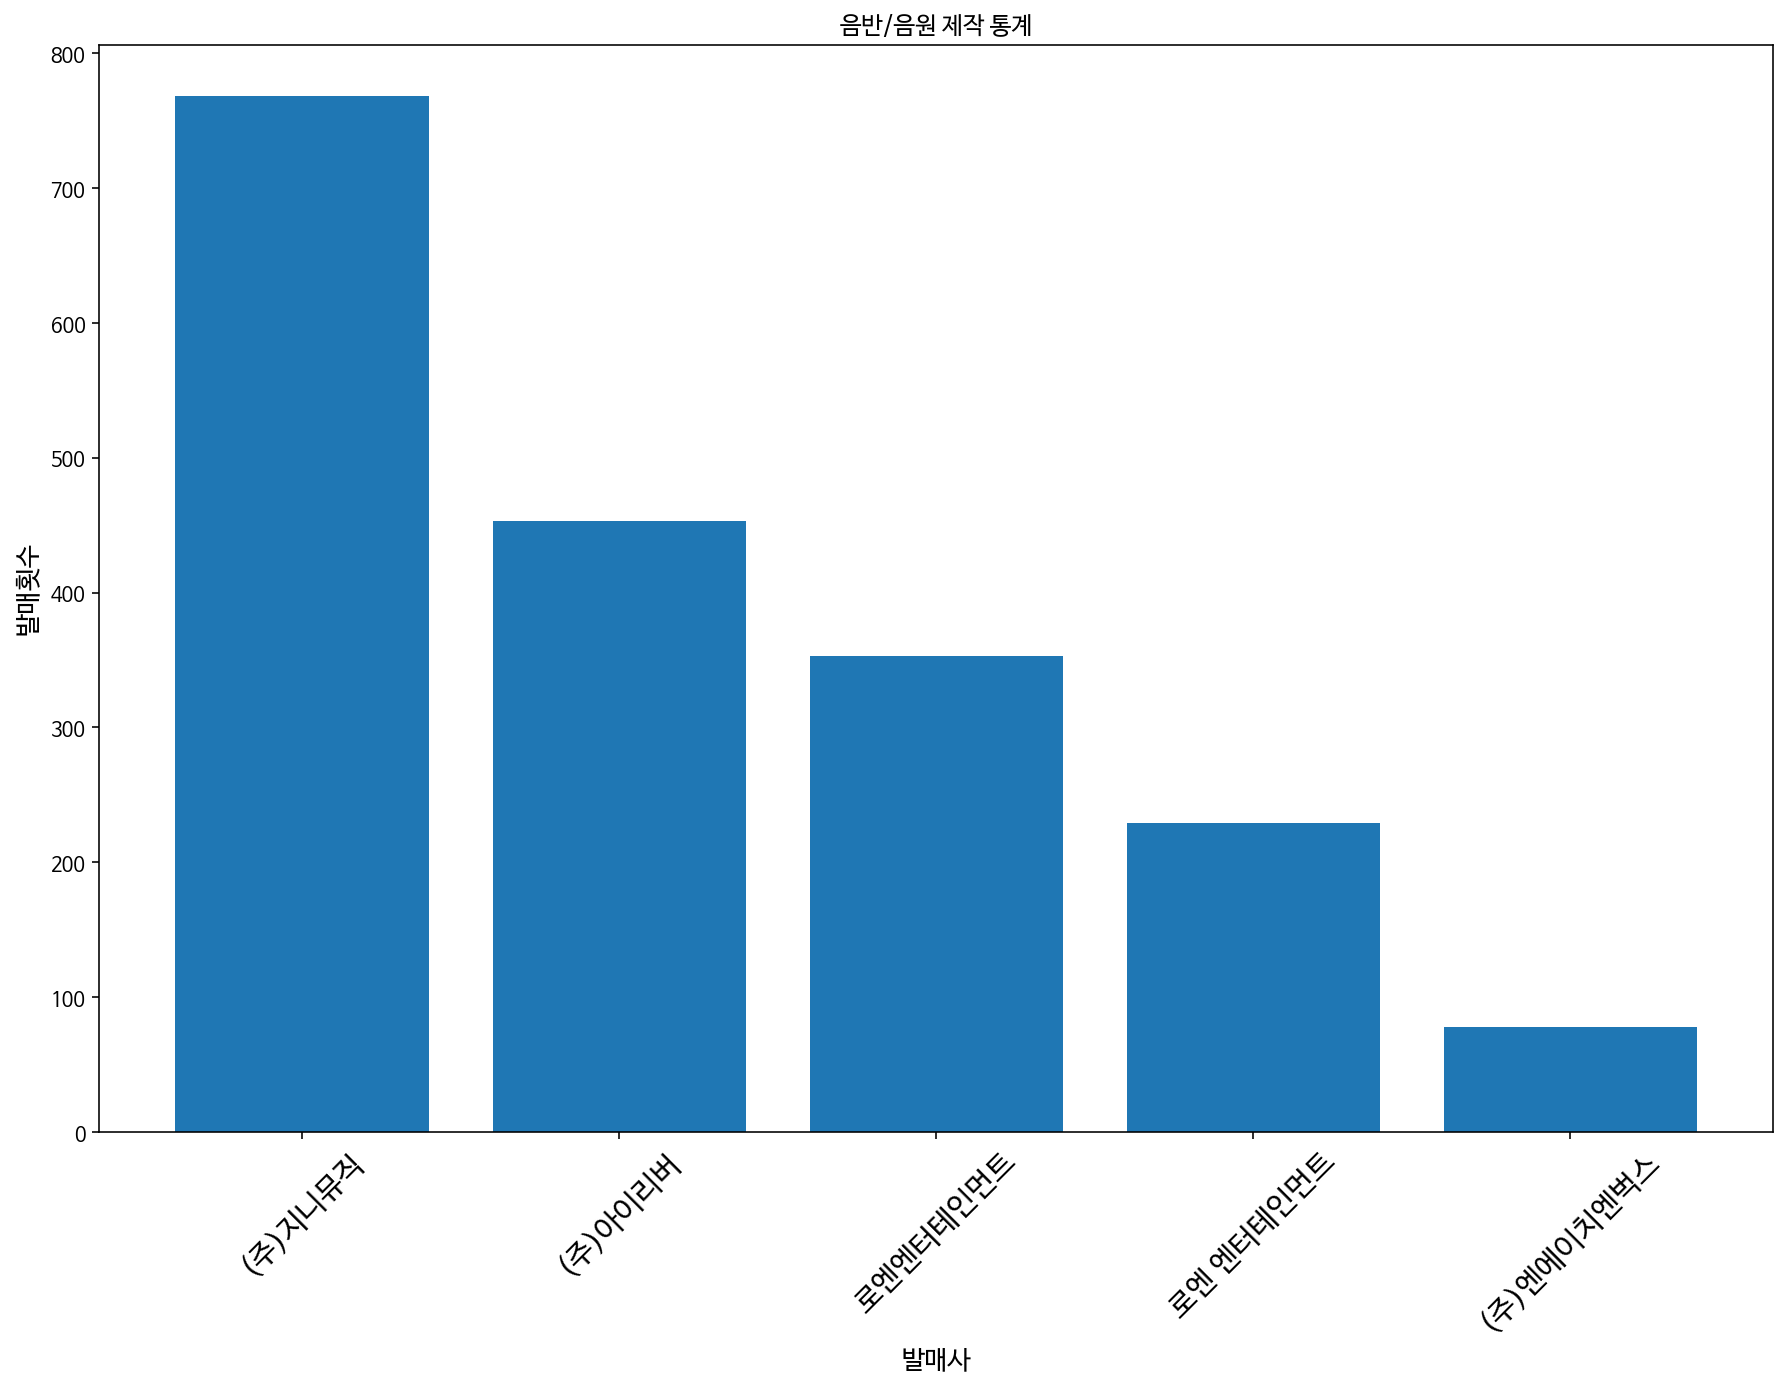

In [17]:
# 2. 차트의 모양
plt.figure( figsize = (15,10) )

# 3. 플로팅
# 플로팅
# x : 연속된 수(스칼라값), ex) 0, 1, 2, ...
# x축에 데이터에 대한 설명이 나타나야 하는데 현재는 0, 1, 2, .. 같은 수치로 되어 있어 의미 없음. 이에 일단 y값을 Series로 넣어서 처리
x = np.arange(tmp.index.shape[0])
y = tmp

# plt.bar( tmp.index, tmp.values )
plt.bar( x, y )

# 라벨링(x, y)
plt.xlabel('발매사', fontsize = 13)
plt.ylabel('발매횟수', fontsize = 13)

# 제목
plt.title('음반/음원 제작 통계')

# x축에 항목 보이기
plt.xticks( x, tmp.index, fontsize = 15, rotation = 45 )

# 4. 차트 보이기
plt.show()

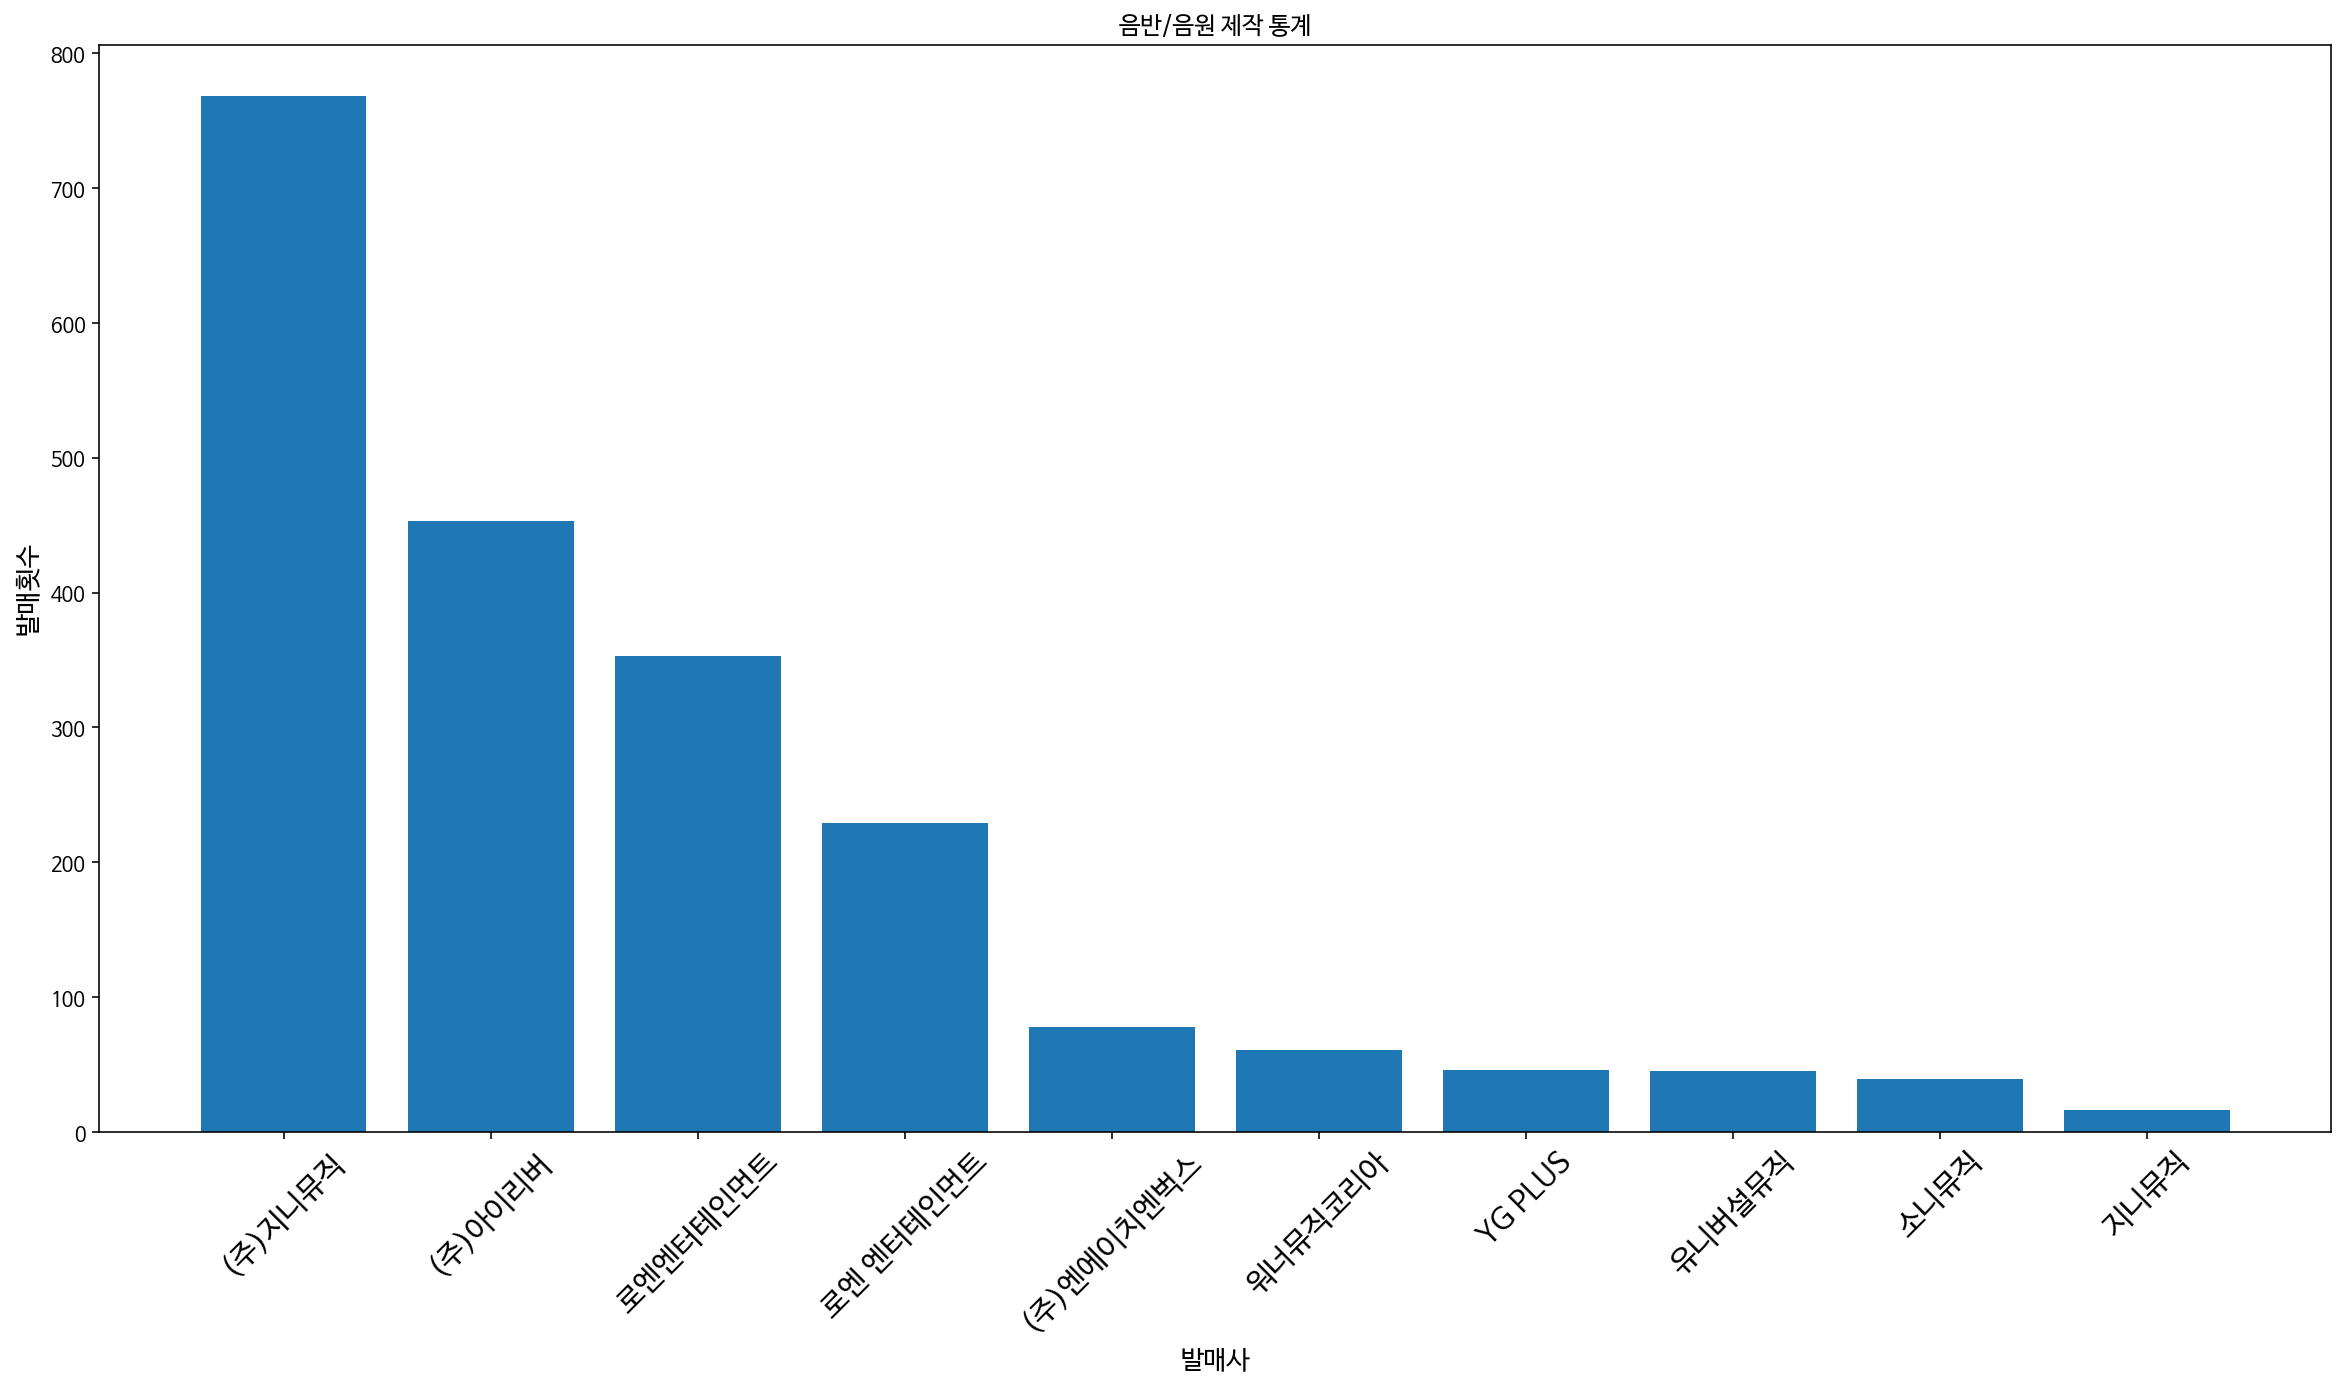

In [18]:
# Series 자체 구성원을 가지고 표현 가능
# pandas로 만든 데이터를 matplotlib를 이용해서 표현

tmp = music.Distribution.value_counts().head(10)
# x = np.arange(tmp.index.shape[0])

plt.figure( figsize = (20,10) )
plt.bar( tmp.index, tmp.values )
plt.xlabel('발매사', fontsize = 13)
plt.ylabel('발매횟수', fontsize = 13)
plt.title('음반/음원 제작 통계')
plt.xticks( tmp.index, tmp.index, fontsize = 15, rotation = 45 )
plt.show()

In [19]:
# 데이터 프레임이나 시리즈로 직접 그리기
# pandas도 ploting 함수를 가지고 있음

music.head(3)
# 데이터를 들여다보니 특정 column에 중복된 데이터가 다수 존재(반복되는 패턴 有) → 피벗 테이블의 대상이거나 그룹화의 대상(group by)

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count,Date1
0,2017,1,Boys and Girls Music Vol. 1,샘김,알앤비/어반,2017.01.25,로엔 엔터테인먼트,8.6,2,2017-01-25
1,2017,1,여자친구 The 1st Album 'LOL',여자친구(GFRIEND),댄스,2016.07.11,로엔엔터테인먼트,8.1,12,2016-07-11
2,2017,1,Collage (EP),The Chainsmokers,일렉트로니카,2016.11.05,소니뮤직,7.5,5,2016-11-05


In [20]:
# Distribution 기준으로 피벗을 수행하시오 = Distribution을 인덱스로 배치, 나머지는 알아서 표현
pd.pivot_table(
    music, 
    index   = 'Distribution', 
    values  = ['Music Count', 'Rating'],
    aggfunc = [np.sum, np.mean, len]
)
# Rating에서는 합산을 원하고, Distribution의 개수를 포함하는 형식으로 테이블을 꾸리고 싶음
# 그룹 단위로 개별적인 데이터를 특성 있게 구하고 싶음 → 피벗보다는 그룹화(groupby)가 적합

sum                mean                   len       
                 Music Count  Rating Music Count    Rating Music Count Rating
Distribution                                                                 
(주)루미넌트엔터테인먼트             19    29.1    4.750000  7.275000           4    4.0
(주)뮤직앤뉴                   62   108.7    4.769231  8.361538          13   13.0
(주)미러볼뮤직                  30    24.0    5.000000  4.000000           6    6.0
(주)벅스                      2     8.6    2.000000  8.600000           1    1.0
(주)아이리버                 5122  3818.9   11.306843  8.430243         453  453.0
(주)엔에이치엔벅스               614   663.8    7.871795  8.510256          78   78.0
(주)인터파크                  104   123.3    6.500000  7.706250          16   16.0
(주)지니뮤직                 4480  6192.9    5.833333  8.063672         768  768.0
Mirrorball Music          48    64.8    6.000000  8.100000           8    8.0
Sony Music                 9    56.6    1.500000  9.433333           6    6.0
Universal                 51    98.7    4.636364  8.972727          11   11.0
Warner(Korea)             17    19.2    8.500000  9.600000           2    2.0
YG PLUS                  276   385.0    6.000000  8.369565          46   46.0
㈜인터파크                     12    16.8    6.000000  8.400000           2    2.0
다날 엔터테인먼트                 12    42.6    2.000000  7.100000           6    6.0
로엔 엔터테인먼트                960  1918.7    4.192140  8.378603         229  229.0
로엔엔터테인먼트                2074  2891.8    5.875354  8.192068         353  353.0
소니뮤직                     338   323.7    8.666667  8.300000          39   39.0
워너뮤직코리아                  798   518.1   13.081967  8.493443          61   61.0
유니버설뮤직                   661   371.3   14.688889  8.251111          45   45.0
지니뮤직                      71   128.7    4.437500  8.043750          16   16.0
퍼플파인 엔터테인먼트               14    41.3    2.000000  5.900000           7    7.0
퍼플파인엔터테인먼트                35    10.5    5.000000  1.500000           7    7.0
포크라노스                      1     7.9    1.000000  7.900000           1    1.0

In [21]:
# Distribution 단위로 그룹화
# Rating은 총합, Distribution의 개수로 표현
music.groupby('Distribution').agg({
    'Rating'       : 'sum',
    'Distribution' : 'count'
}).head()

,Rating,Distribution
Distribution,,
(주)루미넌트엔터테인먼트,29.1,4
(주)뮤직앤뉴,108.7,13
(주)미러볼뮤직,24.0,6
(주)벅스,8.6,1
(주)아이리버,3818.9,453


In [22]:
tmp = music.groupby('Distribution').agg({
    'Rating'       : 'mean',
    'Distribution' : 'count'
}).sort_values( by = 'Rating', ascending = False)
tmp
# 데이터를 살펴보니 평점이 높아도, 제작수가 적어서 유리한 부분이 존재
# 2년간 제작수가 10개 이상 되는 제작사만 통계에 포함시키겠음

,Rating,Distribution
Distribution,,
Warner(Korea),9.600000,2
Sony Music,9.433333,6
Universal,8.972727,11
(주)벅스,8.600000,1
(주)엔에이치엔벅스,8.510256,78
워너뮤직코리아,8.493443,61
(주)아이리버,8.430243,453
㈜인터파크,8.400000,2
로엔 엔터테인먼트,8.378603,229


In [23]:
# 10개 이상 제작한 제작사만 수집(10이라는 수치는 설정)
# 후에 산포도를 그리고 평균선을 그려보면 지표를 추론할 수 있음(지금은 10)
tmp = tmp[ tmp.Distribution >= 10 ]
tmp.shape

(13, 2)

In [24]:
tmp

,Rating,Distribution
Distribution,,
Universal,8.972727,11
(주)엔에이치엔벅스,8.510256,78
워너뮤직코리아,8.493443,61
(주)아이리버,8.430243,453
로엔 엔터테인먼트,8.378603,229
YG PLUS,8.369565,46
(주)뮤직앤뉴,8.361538,13
소니뮤직,8.300000,39
유니버설뮤직,8.251111,45


In [25]:
tmp = music.groupby('Distribution').agg({
    'Rating'       : 'sum',
    'Distribution' : 'count'
}).sort_values( by = 'Rating', ascending = False)
tmp.head()

,Rating,Distribution
Distribution,,
(주)지니뮤직,6192.9,768
(주)아이리버,3818.9,453
로엔엔터테인먼트,2891.8,353
로엔 엔터테인먼트,1918.7,229
(주)엔에이치엔벅스,663.8,78


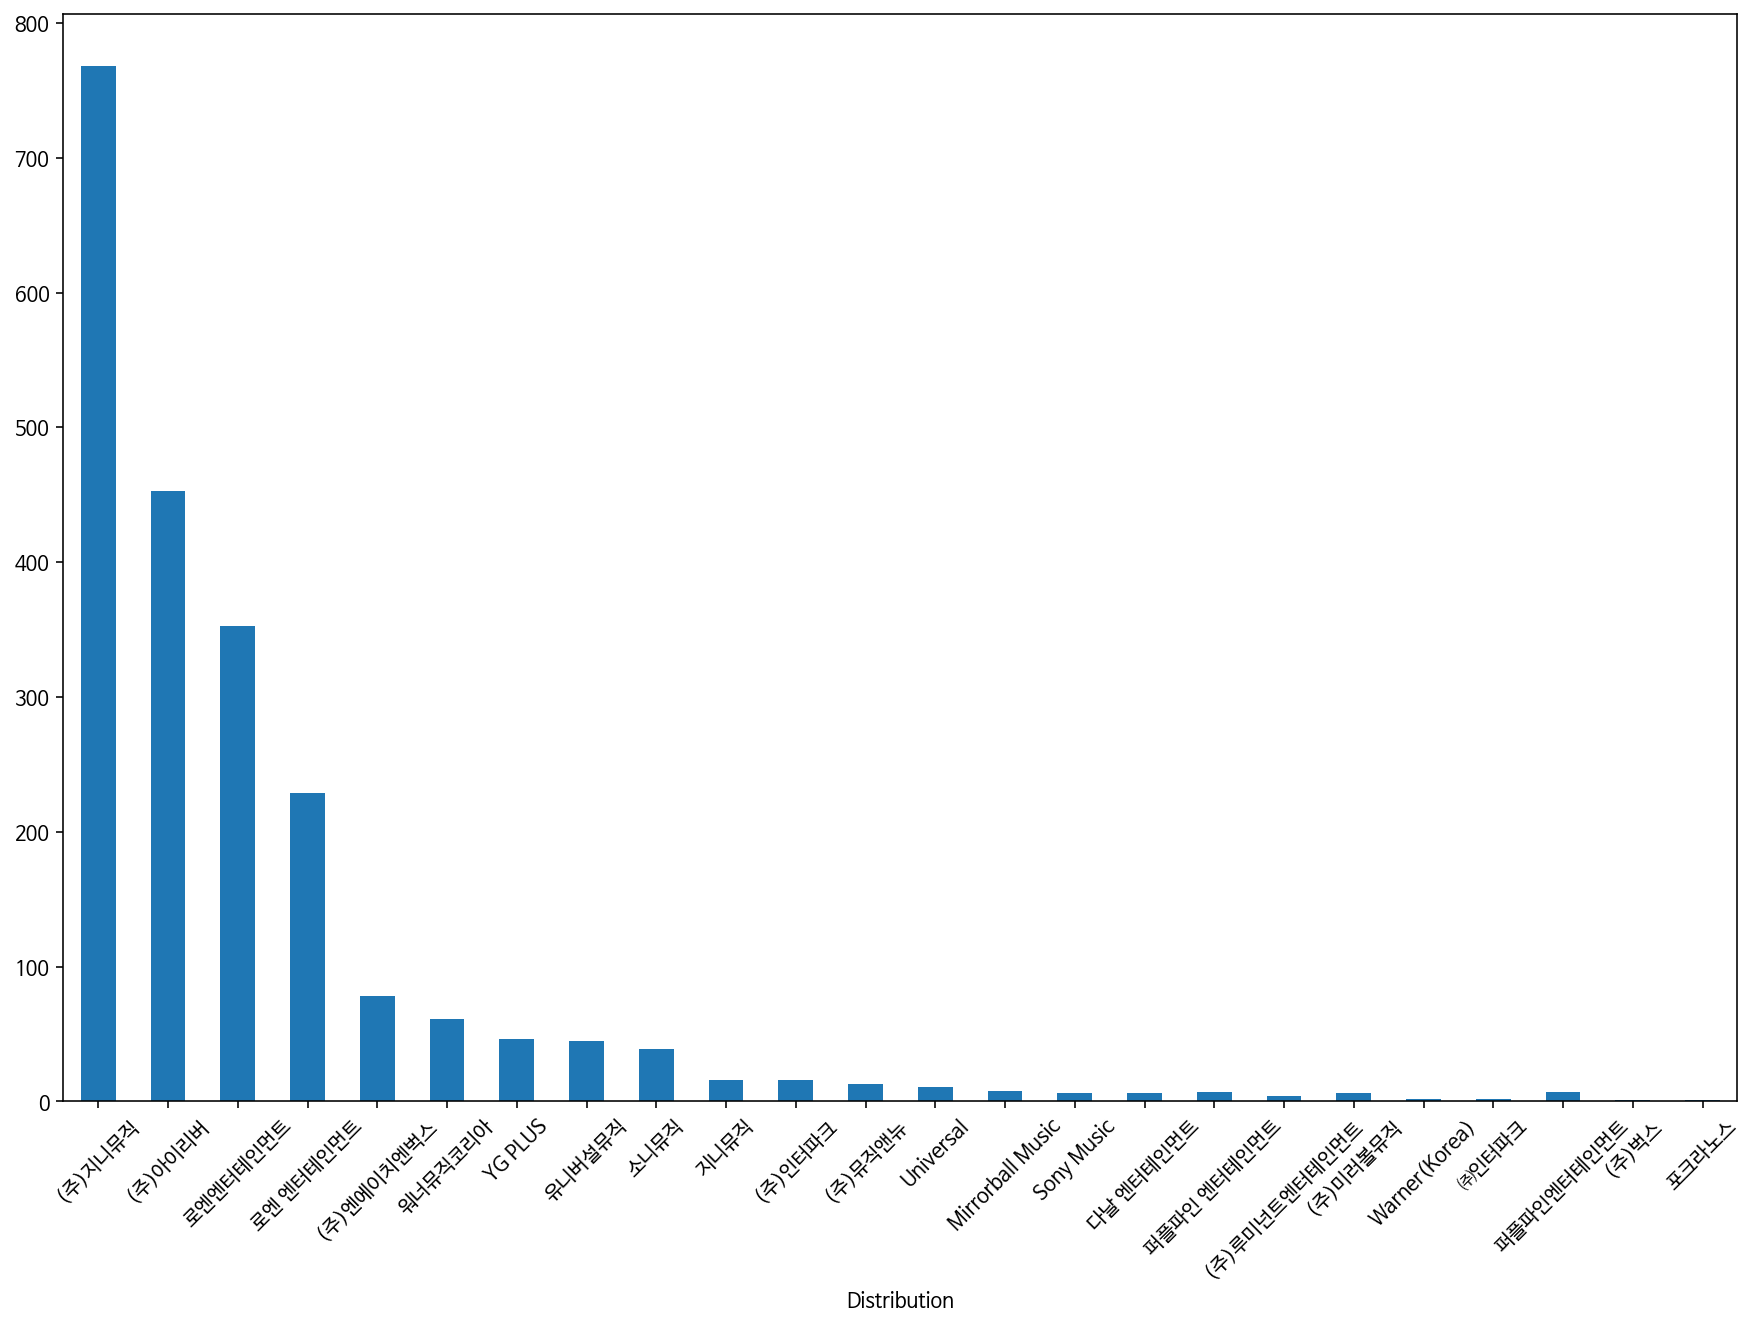

In [26]:
# 직접 시각화
# 시각화 방법 (2) DataFrame에서 직접 시각화 수행
# 플로팅 함수는 plot() 하나임, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot
# 종류는 kind parameter로 결정됨
tmp['Distribution'].plot( kind = "bar", figsize = (15, 10), rot = 45 )

# 데이터 분석

In [27]:
music.describe()

,Year,Month,Rating,Music Count
count,2178.000000,2178.000000,2178.000000,2178.000000
mean,2017.455464,6.053260,8.202479,7.258953
std,0.498127,3.228962,0.969064,4.977393
min,2017.000000,1.000000,1.500000,1.000000
25%,2017.000000,3.000000,7.700000,3.000000
50%,2017.000000,6.000000,8.400000,6.000000
75%,2018.000000,9.000000,8.800000,11.000000
max,2018.000000,12.000000,9.900000,26.000000


In [28]:
# type 기반으로 데이터를 모아라 : 수치 number, 블린 bool, ...
# music df 중에서 데이터가 수치인 컬럼만 모음
music.dtypes

Year                     int64
Month                    int64
Album Title             object
Artist Name             object
Genre                   object
Date                    object
Distribution            object
Rating                 float64
Music Count              int64
Date1           datetime64[ns]
dtype: object

In [29]:
# include : 값을 주거나 리스트로 나열하거나, exclude
music.select_dtypes(include = ['number']).head(3)

,Year,Month,Rating,Music Count
0,2017,1,8.6,2
1,2017,1,8.1,12
2,2017,1,7.5,5


In [30]:
# 수치 중에서도 정수만(특정 크기도 可)
# exclude
music.select_dtypes(include = ['number'], exclude=['float64']).head(3)

,Year,Month,Music Count
0,2017,1,2
1,2017,1,12
2,2017,1,5


In [31]:
music.columns

Index(['Year', 'Month', 'Album Title', 'Artist Name', 'Genre', 'Date',
       'Distribution', 'Rating', 'Music Count', 'Date1'],
      dtype='object')

In [32]:
# music data 중에서 장르 결측치가 있다면 출력하시오
# NaN이 존재한다면 혹은 아예 값이 없다면
music[ music.Genre.isna() ]

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count,Date1
1104,2017,12,All I Want For Christmas (EP),Mariah Carey,NaN,2007.11.26,Sony Music,8.9,3,2007-11-26


In [33]:
music[ music.Genre.isnull() ]

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count,Date1
1104,2017,12,All I Want For Christmas (EP),Mariah Carey,NaN,2007.11.26,Sony Music,8.9,3,2007-11-26


In [34]:
# 보정 = 값을 채움
music.Genre.unique()

array(['알앤비/어반', '댄스', '일렉트로니카', '발라드', '드라마음악', '포크,  인디뮤직', '팝',
       '발라드,  락,  포크', '랩/힙합', '포크', '락', '팝,  얼터너티브 락', '댄스,  알앤비/어반',
       '인디뮤직,  랩/힙합', '발라드,  알앤비/어반', '얼터너티브 락', '인디뮤직', 'TV', '발라드,  댄스',
       '클럽/댄스', '발라드,  댄스,  알앤비/어반,  일렉트로니카', '댄스,  일렉트로니카', '영화음악',
       '댄스,  발라드', nan, '발라드,  재즈', '팝,  캐롤', '인디뮤직,  포크', '뮤지컬',
       '발라드,  알앤비/어반,  포크', '발라드,  댄스,  알앤비/어반', '발라드,  락',
       '드라마음악,  드라마음악', '유럽 음악', '댄스,  발라드,  랩/힙합,  알앤비/어반',
       '일렉트로니카,  댄스,  알앤비/어반', '댄스,  알앤비/어반,  일렉트로니카',
       '알앤비/어반,  발라드,  댄스', '일렉트로니카,  인디뮤직', '일렉트로니카,  댄스,  알앤비/어반,  발라드',
       '댄스,  발라드,  알앤비/어반,  랩/힙합,  락'], dtype=object)

In [35]:
# 데이터 보정 : '팝,  캐롤'
music.loc[1104, 'Genre'] = '팝,  캐롤'
music.loc[1104, 'Genre']

'팝,  캐롤'

In [36]:
music[ music.Genre.isna() ]
# 결측 처리 끝남

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count,Date1


# 데이터 모델

# 시스템 통합